In [11]:
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
#from scipy.fftpack import ff
from scipy.fftpack import fft

In [12]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import os
import tensorflow as tf
import time

from numpy import save
import numpy as np

from mne import Epochs, pick_types, events_from_annotations
from mne.io import concatenate_raws
from mne.io.edf import read_raw_edf
from mne.datasets import eegbci

# Trying to Integrate back

## Loading Datasets from S01 S02 S03

In [18]:
with open('data_preprocessed_python\\s01.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1
        
        eeg_data = []
        eeg_labels = []
        
        for i in range (0,40):
            # loop over 0-39 trails
            eeg_data.append(subject["data"][i])
            eeg_labels.append(subject["labels"][i])
            
            #print(i, len(eeg_data))
        
        print(np.array(eeg_data).shape)
        print(np.array(eeg_labels).shape)
            
        #np.array(eeg_data).reshape(np.array(eeg_data).shape[:-2] + (-1,))
            #flat_list_eeg_data = [item for sublist in eeg_data for item in sublist]
#         flat_list_eeg_labels = [item for sublist in eeg_labels for item in sublist]
            
        np.save('data_preprocessed_python\\s01_data_cwt_secondtry', eeg_data, allow_pickle=True, fix_imports=True)
#         np.save('data_preprocessed_python\\s01_labels_cwt', flat_list_eeg_labels, allow_pickle=True, fix_imports=True)

(40, 40, 8064)
(40, 4)


In [19]:
with open('data_preprocessed_python\\s02.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1
        
        eeg_data2 = []
        eeg_labels2 = []
        
        for i in range (0,40):
            # loop over 0-39 trails
            eeg_data2.append(subject["data"][i])
            eeg_labels2.append(subject["labels"][i])

        print(np.array(eeg_data2).shape)
        print(np.array(eeg_labels2).shape)
        np.save('data_preprocessed_python\\s02_data_cwt_secondtry', eeg_data, allow_pickle=True, fix_imports=True)

(40, 40, 8064)
(40, 4)


In [20]:
dataarr = np.concatenate((eeg_data, eeg_data2), axis=0)
print(dataarr.shape)

labelsarr = np.concatenate((eeg_labels, eeg_labels2), axis=0)
print(labelsarr.shape)

(80, 40, 8064)
(80, 4)


In [21]:
with open('data_preprocessed_python\\s03.dat', 'rb') as file:

        subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1
        
        eeg_data3 = []
        eeg_labels3 = []
        
        for i in range (0,40):
            # loop over 0-39 trails
            eeg_data3.append(subject["data"][i])
            eeg_labels3.append(subject["labels"][i])

        print(np.array(eeg_data3).shape)
        print(np.array(eeg_labels3).shape)
        np.save('data_preprocessed_python\\s03_data_cwt_secondtry', eeg_data, allow_pickle=True, fix_imports=True)

(40, 40, 8064)
(40, 4)


In [22]:
dataarr = np.concatenate((dataarr, eeg_data3), axis=0)
print(dataarr.shape)

labelsarr = np.concatenate((labelsarr, eeg_labels3), axis=0)
print(labelsarr.shape)

(120, 40, 8064)
(120, 4)


## Reshaping Data Array into 2D, by combining the FIRST 2 dimensions 

Physical Implication: data: 40 x 40 x 8064	video/trial x channel x data

So first 2 dimensions combine mean that we are getting a whole lump of data sets, dont care abt which trial or which channel

For labels, video/trial x label (valence, arousal, dominance, liking)

So need to artifically inflate the number of label counts, for each video/trial, need times 40 of that same label

In [23]:
#from https://stackoverflow.com/questions/36370956/how-to-combine-dimensions-in-numpy-array

import functools
def combine_dims(a, i=0, n=1):
  """
  Combines dimensions of numpy array `a`, 
  starting at index `i`,
  and combining `n` dimensions
  """
  s = list(a.shape)
  combined = functools.reduce(lambda x,y: x*y, s[i:i+n+1])
  return np.reshape(a, s[:i] + [combined] + s[i+n+1:])

In [24]:
#before combining last 2 dimensions
print(np.array(dataarr).shape)

#np.array(eeg_data).reshape(np.array(eeg_data).shape[:-2] + (-1,))

#eeg_data = combine_dims(np.array(eeg_data), 1) # combines dimension 1 and 2
eeg_data = combine_dims(np.array(dataarr), 0) # combines dimension 0 and 1

# imgs.shape = (100, 718*686, 3)

#after combining last 2 dimensions
print(np.array(eeg_data).shape)

np.save('data_preprocessed_python\\data_cwt_fourthtry', eeg_data, allow_pickle=True, fix_imports=True)

(120, 40, 8064)
(4800, 8064)


In [25]:
datafile = np.load(open('data_preprocessed_python\\data_cwt_fourthtry.npy','rb'),allow_pickle=True)

print(datafile.shape)
print(datafile[1][1])

(4800, 8064)
1.390082695001436


In [26]:


# Reducing the size of the data file/list

# Used to take the first 1600, then got weird (?) overfitted results

# So going to be taking 4000 we are taking the first 10 channels

# - 1	Fp1	
# - 2	AF3
# - 3	F3
# - 4	F7
# - 5	FC5
# - 6	FC1
# - 7	C3
# - 8	T7
# - 9 	CP5
# - 10	CP1

# Actually gonna ignore this for now

In [27]:
eeg_data_array = np.array(eeg_data)

print(eeg_data_array.shape)
#before reducing in size

(4800, 8064)


In [28]:
# reduce_size = 4000
# #cos its 40 trials and each trial has 40 channels, so its good to be a multiple of 40 
# #so in this case its 10 channels worth of data lor

# full_4000 = eeg_data_array[:,:reduce_size]

# #for learning how to index this, from 
# #https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/

In [29]:
# print(np.array(full_4000).shape)

In [30]:
# full_4000[1]

## For the labels right..

After one hot encoding, instead of having 4 disinct categories, it instead splits into TEN categories. And the idea, in accordance with the CWT sample, is to instead assign a list with a specific label (A to J), and ask the model to categorise based on that, so we are converting a one hot into a single dimension list w aributarily assigned labels for classification

### Newer Comments

We'll need to make first dimension 4800, so for every label, need duplicate by 40 times

In [31]:
print(np.array(labelsarr).shape)
eeg_labels = labelsarr

#before anything

(120, 4)


In [32]:
eeglabels_4800 = []

# for i in range(0,2):
#     for j in range (0,4):
#         eeglabels_4800.append(eeg_labels[0])

for i in eeg_labels:
    #append the list [3.65 2.5  3.03 5.92] to 4800list 40 times per list
    for j in range (0,40):
        eeglabels_4800.append(i)

print(len(eeglabels_4800))

4800


In [33]:
eeg_labels = np.array(eeglabels_4800)

print(eeg_labels[32])

[7.71 7.6  6.9  7.83]


In [34]:
Y = np.array(eeg_labels)

Arousal = np.ravel(Y[:, [0]])
Valence = np.ravel(Y[:, [1]])
Domain = np.ravel(Y[:, [2]])
Like = np.ravel(Y[:, [3]])

Z = Valence

#OMG WE ARE JUST PREDICTING VALANCE!!

In [35]:
Z = Arousal

print(Z)

print(max(Z))
print(min(Z))

[7.71 7.71 7.71 ... 5.38 5.38 5.38]
9.0
1.0


so the data we are working with is to predict VALENCE (a number from 1 to 9) given 

In [36]:
from keras.utils import to_categorical
y = to_categorical(Z)

print(y)

print(y.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4800, 10)


In [37]:
eeg_labels = y

In [38]:
print(eeg_labels.shape)
# print(eeg_labels)

(4800, 10)


In [39]:
print(type(int(eeg_labels[0][0])))

<class 'int'>


In [40]:
#ok lets make this into a 1D array

#the source code was like ['AAR', 'AAR', 'CHF' etc] with each line being represented as a category label
#so lets try, we have 9 columns/categories, lets call them 'A' to 'J'

print(eeg_labels[0][0])

flattened_eeg_labels = []
for rows in eeg_labels:
    #print(rows)
    if rows[0] == 1:
        flattened_eeg_labels.append('A')
    elif rows[1] == 1:
        flattened_eeg_labels.append('B')
    elif rows[2] == 1:
        flattened_eeg_labels.append('C')
    elif rows[3] == 1:
        flattened_eeg_labels.append('D')
    elif rows[4] == 1:
        flattened_eeg_labels.append('E')
    elif rows[5] == 1:
        flattened_eeg_labels.append('F')
    elif rows[6] == 1:
        flattened_eeg_labels.append('G')
    elif rows[7] == 1:
        flattened_eeg_labels.append('H')
    elif rows[8] == 1:
        flattened_eeg_labels.append('I')
    elif rows[9] == 1:
        flattened_eeg_labels.append('J')
    else:
        print("error")
        
print("completed\n")
print(len(flattened_eeg_labels))
#print(flattened_eeg_labels)

0.0
completed

4800


In [41]:
le = preprocessing.LabelEncoder()
eeg_labels_encoded = le.fit_transform(flattened_eeg_labels)

In [42]:
print(eeg_labels_encoded)

[6 6 6 ... 4 4 4]


### Using CWT to process data

In [25]:
#process data

fs = 70 #len(full_1500[0]), but i think frequency is 70 cos each eeg pulse is 70points
#sgn_length = 2000   #65536   Pay atention with ram memory! 
#holy sht sgn_length does not matter??

size_dataset = len(eeg_data_array)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 20 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = eeg_data_array[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

0 done!
20 done!
40 done!
60 done!
80 done!
100 done!
120 done!
140 done!
160 done!
180 done!
200 done!
220 done!
240 done!
260 done!
280 done!
300 done!
320 done!
340 done!
360 done!
380 done!
400 done!
420 done!
440 done!
460 done!
480 done!
500 done!
520 done!
540 done!
560 done!
580 done!
600 done!
620 done!
640 done!
660 done!
680 done!
700 done!
720 done!
740 done!
760 done!
780 done!
800 done!
820 done!
840 done!
860 done!
880 done!
900 done!
920 done!
940 done!
960 done!
980 done!
1000 done!
1020 done!
1040 done!
1060 done!
1080 done!
1100 done!
1120 done!
1140 done!
1160 done!
1180 done!
1200 done!
1220 done!
1240 done!
1260 done!
1280 done!
1300 done!
1320 done!
1340 done!
1360 done!
1380 done!
1400 done!
1420 done!
1440 done!
1460 done!
1480 done!
1500 done!
1520 done!
1540 done!
1560 done!
1580 done!
1600 done!
1620 done!
1640 done!
1660 done!
1680 done!
1700 done!
1720 done!
1740 done!
1760 done!
1780 done!
1800 done!
1820 done!
1840 done!
1860 done!
1880 done!
1900 done!


## Saving the CWT processed data

In [28]:
print(type(X_full))

<class 'numpy.ndarray'>


In [29]:
np.save('data_preprocessed_python\\CWTprocesseddata', X_full, allow_pickle=True, fix_imports=True)

In [24]:
#loading saved data

with open('data_preprocessed_python\\CWTprocesseddata.npy', 'rb') as DataFile:
    X_full  = np.load(DataFile)

In [ ]:
np.save('data_preprocessed_python\\CWTprocessedlabels', eeg_labels_encoded, allow_pickle=True, fix_imports=True)

In [26]:
#loading saved labels

with open('data_preprocessed_python\\CWTprocessedlabels.npy', 'rb') as LabelFile:
    eeg_labels_encoded  = np.load(LabelFile)

In [161]:
print(eeg_labels_encoded)

[6 6 6 ... 4 4 4]


## Splitting train-test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_full, eeg_labels_encoded, test_size=0.2, random_state=23)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3840, 69, 69, 3)
(960, 69, 69, 3)
(3840,)
(960,)


In [97]:
print(min(y_train))

0


In [120]:
# #code frm some blog too

# from keras.layers import Dense, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.callbacks import History 
# history = History()

# input_shape = (69, 69, 3)

# batch_size = 16
# num_classes = 10
# epochs = 10
 
# x_train = X_train.astype('float32')
# x_test = X_test.astype('float32')
 
# # y_train = keras.utils.to_categorical(Y_train, num_classes)
# # y_test = keras.utils.to_categorical(Y_test, num_classes)

# print(X_train.shape)
# print(X_test.shape)

# print(Y_train.shape)
# print(Y_test.shape)

# print(y_train.shape)
# print(y_test.shape)

## The Model

In [29]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

import sys
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

import kerastuner as kt

In [106]:
batch_size = 32 #they say 32 works well
num_classes = 9 #cos labels has dimension 10, or 10 types of one hot encoded labels
epochs = 200 #start out at 10, if good try 200

In [74]:
# print(type(X_train))
# newxtrain = X_train.astype('float32')
# print(type(newxtrain))

Input shape: (3840, 69, 69, 3)

In [107]:
#BEST NN SO FAR, ABLE TO DO MUCH MORE WITH LESSER LAYERS

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 activation='relu', input_shape=(69, 69, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(138, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 67, 67, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 138)               1987338   
_________________________________________________________________
dense_19 (Dense)             (None, 9)               

In [86]:
# # Defining basic NN
# #Note its NOT a CNN
# #AND ITS NOT GOOD, 10-20% accuracy for both train and test

# num_filter, num_classes = 3, 10
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[69, 69, num_filter]),
#     keras.layers.Dense(300, activation="relu"),                 
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(num_classes, activation="softmax")
# ])
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd", metrics=["accuracy"])

# model.summary()

In [108]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("Best Valence CWT CNN model 200 epcohs.hdf5", monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/200
120/120 [==============================] - ETA: 0s - loss: 48.2335 - accuracy: 0.1831
Epoch 00001: accuracy improved from -inf to 0.18307, saving model to Best Valence CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 35s 291ms/step - loss: 48.2335 - accuracy: 0.1831 - val_loss: 2.0745 - val_accuracy: 0.2156
Epoch 2/200
120/120 [==============================] - ETA: 0s - loss: 1.8914 - accuracy: 0.3307
Epoch 00002: accuracy improved from 0.18307 to 0.33073, saving model to Best Valence CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 31s 256ms/step - loss: 1.8914 - accuracy: 0.3307 - val_loss: 1.7393 - val_accuracy: 0.4021
Epoch 3/200
120/120 [==============================] - ETA: 0s - loss: 1.5961 - accuracy: 0.4753
Epoch 00003: accuracy improved from 0.33073 to 0.47526, saving model to Best Valence CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 30s 247ms/step - loss: 1.5961 - accuracy: 0.4753 - val

Epoch 26/200
120/120 [==============================] - ETA: 0s - loss: 0.2901 - accuracy: 0.9310
Epoch 00026: accuracy did not improve from 0.95990
120/120 [==============================] - 29s 240ms/step - loss: 0.2901 - accuracy: 0.9310 - val_loss: 3.0084 - val_accuracy: 0.6281
Epoch 27/200
120/120 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.9078
Epoch 00027: accuracy did not improve from 0.95990
120/120 [==============================] - 29s 241ms/step - loss: 0.3946 - accuracy: 0.9078 - val_loss: 2.9364 - val_accuracy: 0.6156
Epoch 28/200
120/120 [==============================] - ETA: 0s - loss: 0.2961 - accuracy: 0.9331
Epoch 00028: accuracy did not improve from 0.95990
120/120 [==============================] - 28s 234ms/step - loss: 0.2961 - accuracy: 0.9331 - val_loss: 3.1048 - val_accuracy: 0.6250
Epoch 29/200
120/120 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9602
Epoch 00029: accuracy improved from 0.95990 to 0.9601

Epoch 53/200
120/120 [==============================] - ETA: 0s - loss: 0.7110 - accuracy: 0.8745
Epoch 00053: accuracy did not improve from 0.98099
120/120 [==============================] - 28s 236ms/step - loss: 0.7110 - accuracy: 0.8745 - val_loss: 4.8799 - val_accuracy: 0.6062
Epoch 54/200
120/120 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.9294
Epoch 00054: accuracy did not improve from 0.98099
120/120 [==============================] - 29s 242ms/step - loss: 0.3187 - accuracy: 0.9294 - val_loss: 5.9523 - val_accuracy: 0.6313
Epoch 55/200
120/120 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9586
Epoch 00055: accuracy did not improve from 0.98099
120/120 [==============================] - 28s 237ms/step - loss: 0.2110 - accuracy: 0.9586 - val_loss: 4.8886 - val_accuracy: 0.6427
Epoch 56/200
120/120 [==============================] - ETA: 0s - loss: 0.1123 - accuracy: 0.9716
Epoch 00056: accuracy did not improve from 0.98099
12

Epoch 82/200
120/120 [==============================] - ETA: 0s - loss: 0.8739 - accuracy: 0.7875
Epoch 00082: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 241ms/step - loss: 0.8739 - accuracy: 0.7875 - val_loss: 3.6616 - val_accuracy: 0.5917
Epoch 83/200
120/120 [==============================] - ETA: 0s - loss: 0.4646 - accuracy: 0.8799
Epoch 00083: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 251ms/step - loss: 0.4646 - accuracy: 0.8799 - val_loss: 4.2404 - val_accuracy: 0.5906
Epoch 84/200
120/120 [==============================] - ETA: 0s - loss: 0.2593 - accuracy: 0.9375
Epoch 00084: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 241ms/step - loss: 0.2593 - accuracy: 0.9375 - val_loss: 3.6006 - val_accuracy: 0.6094
Epoch 85/200
120/120 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9482
Epoch 00085: accuracy did not improve from 0.98151
12

Epoch 111/200
120/120 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9789
Epoch 00111: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 241ms/step - loss: 0.0514 - accuracy: 0.9789 - val_loss: 6.7290 - val_accuracy: 0.6198
Epoch 112/200
120/120 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9789
Epoch 00112: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 244ms/step - loss: 0.0513 - accuracy: 0.9789 - val_loss: 6.7905 - val_accuracy: 0.6219
Epoch 113/200
120/120 [==============================] - ETA: 0s - loss: 0.0512 - accuracy: 0.9789
Epoch 00113: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 240ms/step - loss: 0.0512 - accuracy: 0.9789 - val_loss: 6.8510 - val_accuracy: 0.6198
Epoch 114/200
120/120 [==============================] - ETA: 0s - loss: 0.0511 - accuracy: 0.9789
Epoch 00114: accuracy did not improve from 0.9815

Epoch 140/200
120/120 [==============================] - ETA: 0s - loss: 0.2742 - accuracy: 0.9583
Epoch 00140: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 249ms/step - loss: 0.2742 - accuracy: 0.9583 - val_loss: 3.8327 - val_accuracy: 0.6135
Epoch 141/200
120/120 [==============================] - ETA: 0s - loss: 0.2737 - accuracy: 0.9547
Epoch 00141: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 252ms/step - loss: 0.2737 - accuracy: 0.9547 - val_loss: 5.3392 - val_accuracy: 0.6104
Epoch 142/200
120/120 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9688
Epoch 00142: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 245ms/step - loss: 0.0990 - accuracy: 0.9688 - val_loss: 4.7805 - val_accuracy: 0.6229
Epoch 143/200
120/120 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9773
Epoch 00143: accuracy did not improve from 0.9815

Epoch 169/200
120/120 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9810
Epoch 00169: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 248ms/step - loss: 0.0503 - accuracy: 0.9810 - val_loss: 8.1805 - val_accuracy: 0.6448
Epoch 170/200
120/120 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9810
Epoch 00170: accuracy did not improve from 0.98151
120/120 [==============================] - 29s 244ms/step - loss: 0.0503 - accuracy: 0.9810 - val_loss: 8.2209 - val_accuracy: 0.6427
Epoch 171/200
120/120 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9810
Epoch 00171: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 247ms/step - loss: 0.0503 - accuracy: 0.9810 - val_loss: 8.2610 - val_accuracy: 0.6448
Epoch 172/200
120/120 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9810
Epoch 00172: accuracy did not improve from 0.9815

Epoch 198/200
120/120 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9799
Epoch 00198: accuracy did not improve from 0.98151
120/120 [==============================] - 31s 256ms/step - loss: 0.0528 - accuracy: 0.9799 - val_loss: 8.6161 - val_accuracy: 0.6313
Epoch 199/200
120/120 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9799
Epoch 00199: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 249ms/step - loss: 0.0525 - accuracy: 0.9799 - val_loss: 8.6869 - val_accuracy: 0.6302
Epoch 200/200
120/120 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9792
Epoch 00200: accuracy did not improve from 0.98151
120/120 [==============================] - 30s 249ms/step - loss: 0.0551 - accuracy: 0.9792 - val_loss: 8.3839 - val_accuracy: 0.6292


In [130]:
#THIS IS THE IMPORTANT ONE
# model.save("CWT_model_final") #trained for 200 epochs
# model.save_weights("CWTweights.h5")

In [131]:
# from tensorflow import keras
# my_model = keras.models.load_model('my_model')
# my_model.load_weights("weights.h5")

In [109]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(score)

30/30 [==============================] - 2s 74ms/step - loss: 8.3839 - accuracy: 0.6292
Test loss: 8.383912086486816
Test accuracy: 0.6291666626930237
[8.383912086486816, 0.6291666626930237]


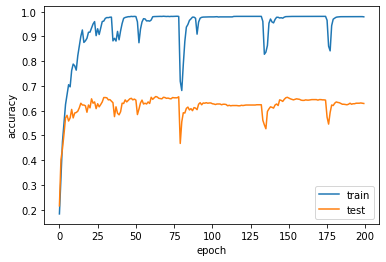

In [110]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

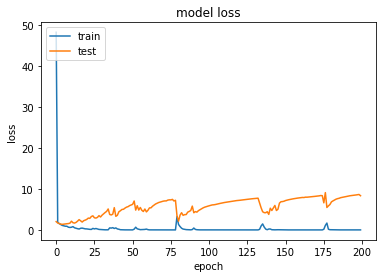

In [111]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

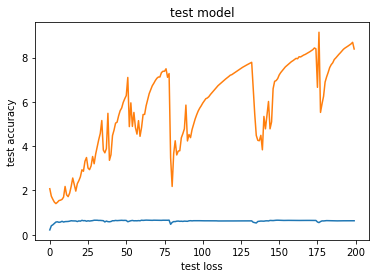

In [112]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

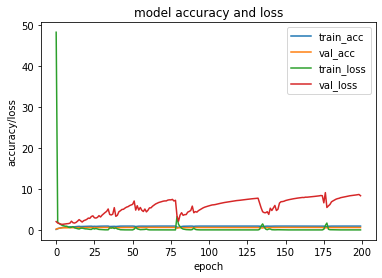

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')
plt.show()

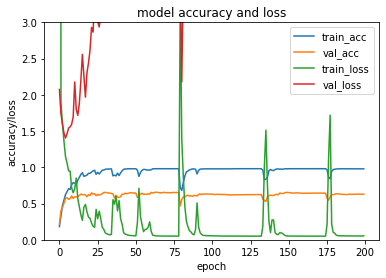

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')

plt.ylim([0, 3])

plt.show()

# AROUSAL

In [125]:
Z = Arousal
fs = 70

print(Z)

print(max(Z))
print(min(Z))

y = to_categorical(Z)

print(y)

print(y.shape)

eeg_labels = y

print(eeg_labels.shape)
# print(eeg_labels)

flattened_eeg_labels = []
for rows in eeg_labels:
    #print(rows)
    if rows[0] == 1:
        flattened_eeg_labels.append('A')
    elif rows[1] == 1:
        flattened_eeg_labels.append('B')
    elif rows[2] == 1:
        flattened_eeg_labels.append('C')
    elif rows[3] == 1:
        flattened_eeg_labels.append('D')
    elif rows[4] == 1:
        flattened_eeg_labels.append('E')
    elif rows[5] == 1:
        flattened_eeg_labels.append('F')
    elif rows[6] == 1:
        flattened_eeg_labels.append('G')
    elif rows[7] == 1:
        flattened_eeg_labels.append('H')
    elif rows[8] == 1:
        flattened_eeg_labels.append('I')
    elif rows[9] == 1:
        flattened_eeg_labels.append('J')
    else:
        print("error")
        
print("completed\n")
print(len(flattened_eeg_labels))
#print(flattened_eeg_labels)

le = preprocessing.LabelEncoder()
eeg_labels_encoded = le.fit_transform(flattened_eeg_labels)

print(eeg_labels_encoded)

size_dataset = len(eeg_data_array)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 20 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = eeg_data_array[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

[7.71 7.71 7.71 ... 5.38 5.38 5.38]
9.0
1.0
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4800, 10)
(4800, 10)
completed

4800
[6 6 6 ... 4 4 4]
0 done!
20 done!
40 done!
60 done!
80 done!
100 done!
120 done!
140 done!
160 done!
180 done!
200 done!
220 done!
240 done!
260 done!
280 done!
300 done!
320 done!
340 done!
360 done!
380 done!
400 done!
420 done!
440 done!
460 done!
480 done!
500 done!
520 done!
540 done!
560 done!
580 done!
600 done!
620 done!
640 done!
660 done!
680 done!
700 done!
720 done!
740 done!
760 done!
780 done!
800 done!
820 done!
840 done!
860 done!
880 done!
900 done!
920 done!
940 done!
960 done!
980 done!
1000 done!
1020 done!
1040 done!
1060 done!
1080 done!
1100 done!
1120 done!
1140 done!
1160 done!
1180 done!
1200 done!
1220 done!
1240 done!
1260 done!
1280 done!
1300 done!
1320 done!
1340 done!
1360 done!
1380 done!
1400 done!
1420 done!
1440 don

In [126]:
##saving AROUSAL CWT 

np.save('data_preprocessed_python\\CWTprocesseddataarousal', X_full, allow_pickle=True, fix_imports=True)

#loading saved data

with open('data_preprocessed_python\\CWTprocesseddataarousal.npy', 'rb') as DataFile:
    X_full  = np.load(DataFile)

np.save('data_preprocessed_python\\CWTprocessedlabels', eeg_labels_encoded, allow_pickle=True, fix_imports=True)

#loading saved labels

with open('data_preprocessed_python\\CWTprocessedlabels.npy', 'rb') as LabelFile:
    eeg_labels_encoded  = np.load(LabelFile)

## Splitting train-test

X_train, X_test, y_train, y_test = train_test_split(X_full, eeg_labels_encoded, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(min(y_train))

(3840, 69, 69, 3)
(960, 69, 69, 3)
(3840,)
(960,)
0


In [127]:
batch_size = 32 #they say 32 works well
num_classes = 9 #cos labels has dimension 10, or 10 types of one hot encoded labels
epochs = 200 #start out at 10, if good try 200

In [128]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 activation='relu', input_shape=(69, 69, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(138, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 67, 67, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 138)               1987338   
_________________________________________________________________
dense_21 (Dense)             (None, 9)               

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("Best Arousal CWT CNN model 200 epcohs.hdf5", monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/200
120/120 [==============================] - ETA: 0s - loss: 19.4356 - accuracy: 0.1805
Epoch 00001: accuracy improved from -inf to 0.18047, saving model to Best Arousal CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 30s 251ms/step - loss: 19.4356 - accuracy: 0.1805 - val_loss: 2.1263 - val_accuracy: 0.2333
Epoch 2/200
120/120 [==============================] - ETA: 0s - loss: 1.9718 - accuracy: 0.3245
Epoch 00002: accuracy improved from 0.18047 to 0.32448, saving model to Best Arousal CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 30s 248ms/step - loss: 1.9718 - accuracy: 0.3245 - val_loss: 1.9997 - val_accuracy: 0.3677
Epoch 3/200
120/120 [==============================] - ETA: 0s - loss: 1.7306 - accuracy: 0.4440
Epoch 00003: accuracy improved from 0.32448 to 0.44401, saving model to Best Arousal CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 29s 244ms/step - loss: 1.7306 - accuracy: 0.4440 - val

Epoch 68/200
120/120 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9802
Epoch 00068: accuracy did not improve from 0.98021
120/120 [==============================] - 29s 242ms/step - loss: 0.0543 - accuracy: 0.9802 - val_loss: 6.1046 - val_accuracy: 0.6573
Epoch 69/200
120/120 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.9807
Epoch 00069: accuracy improved from 0.98021 to 0.98073, saving model to Best Arousal CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 30s 249ms/step - loss: 0.0532 - accuracy: 0.9807 - val_loss: 6.2562 - val_accuracy: 0.6573
Epoch 70/200
120/120 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9711
Epoch 00080: accuracy did not improve from 0.98099
120/120 [==============================] - 29s 244ms/step - loss: 0.0917 - accuracy: 0.9711 - val_loss: 4.7891 - val_accuracy: 0.6719
Epoch 81/200
120/120 [==============================] - ETA: 0s - loss: 0.0834 - accura

120/120 [==============================] - ETA: 0s - loss: 0.1069 - accuracy: 0.9690
Epoch 00155: accuracy did not improve from 0.98099
120/120 [==============================] - 32s 264ms/step - loss: 0.1069 - accuracy: 0.9690 - val_loss: 9.3672 - val_accuracy: 0.6677
Epoch 156/200
120/120 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9734
Epoch 00156: accuracy did not improve from 0.98099
120/120 [==============================] - 30s 251ms/step - loss: 0.0755 - accuracy: 0.9734 - val_loss: 10.2710 - val_accuracy: 0.6583
Epoch 157/200
120/120 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9732
Epoch 00157: accuracy did not improve from 0.98099
120/120 [==============================] - 30s 250ms/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 10.2901 - val_accuracy: 0.6615
Epoch 158/200
120/120 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9706
Epoch 00158: accuracy did not improve from 0.98099
120/120 [=

30/30 [==============================] - 3s 84ms/step - loss: 9.7154 - accuracy: 0.6375
Test loss: 9.715352058410645
Test accuracy: 0.637499988079071
[9.715352058410645, 0.637499988079071]


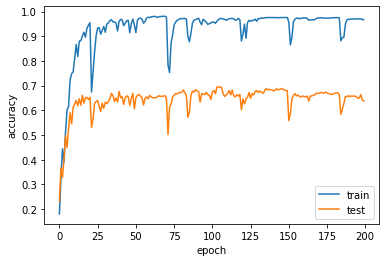

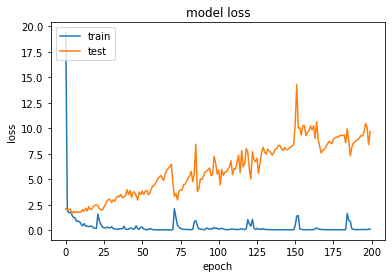

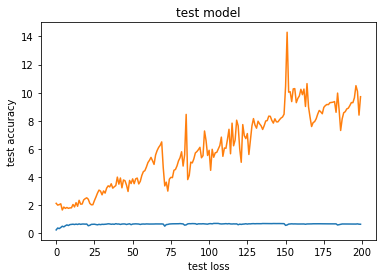

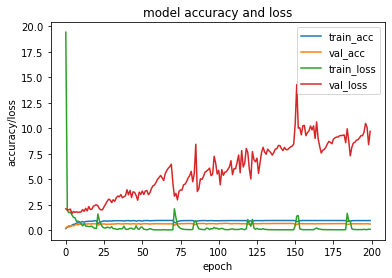

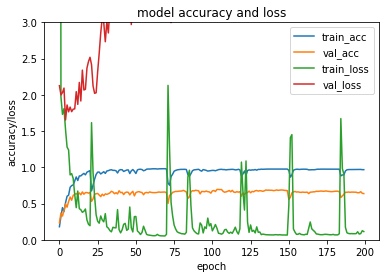

In [131]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(score)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')

plt.ylim([0, 3])

plt.show()

# LIKENESS

In [132]:
Z = Like
fs = 70

print(Z)

print(max(Z))
print(min(Z))

y = to_categorical(Z)

print(y)

print(y.shape)

eeg_labels = y

print(eeg_labels.shape)
# print(eeg_labels)

flattened_eeg_labels = []
for rows in eeg_labels:
    #print(rows)
    if rows[0] == 1:
        flattened_eeg_labels.append('A')
    elif rows[1] == 1:
        flattened_eeg_labels.append('B')
    elif rows[2] == 1:
        flattened_eeg_labels.append('C')
    elif rows[3] == 1:
        flattened_eeg_labels.append('D')
    elif rows[4] == 1:
        flattened_eeg_labels.append('E')
    elif rows[5] == 1:
        flattened_eeg_labels.append('F')
    elif rows[6] == 1:
        flattened_eeg_labels.append('G')
    elif rows[7] == 1:
        flattened_eeg_labels.append('H')
    elif rows[8] == 1:
        flattened_eeg_labels.append('I')
    elif rows[9] == 1:
        flattened_eeg_labels.append('J')
    else:
        print("error")
        
print("completed\n")
print(len(flattened_eeg_labels))
#print(flattened_eeg_labels)

le = preprocessing.LabelEncoder()
eeg_labels_encoded = le.fit_transform(flattened_eeg_labels)

print(eeg_labels_encoded)

size_dataset = len(eeg_data_array)
scales = range(1, fs)
waveletname = 'morl'
 
X_full = np.ndarray(shape=(size_dataset, fs-1, fs-1, 3))
                 
for i in range(0, size_dataset):
    if i % 20 == 0:
        print (i, 'done!')
    for j in range(0, 3):
        signal = eeg_data_array[i]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        X_full[i, :, :, j] = coeff[:,:fs-1]

##saving AROUSAL CWT 

np.save('data_preprocessed_python\\CWTprocesseddatalike', X_full, allow_pickle=True, fix_imports=True)

#loading saved data

with open('data_preprocessed_python\\CWTprocesseddatalike.npy', 'rb') as DataFile:
    X_full  = np.load(DataFile)

np.save('data_preprocessed_python\\CWTprocessedlabelslike', eeg_labels_encoded, allow_pickle=True, fix_imports=True)

#loading saved labels

with open('data_preprocessed_python\\CWTprocessedlabels.npy', 'rb') as LabelFile:
    eeg_labels_encoded  = np.load(LabelFile)

## Splitting train-test

X_train, X_test, y_train, y_test = train_test_split(X_full, eeg_labels_encoded, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(min(y_train))

batch_size = 32 #they say 32 works well
num_classes = 9 #cos labels has dimension 10, or 10 types of one hot encoded labels
epochs = 200 #start out at 10, if good try 200

model = Sequential()

model.add(Conv2D(32, (3, 3), strides=(1, 1),
                 activation='relu', input_shape=(69, 69, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(138, activation="relu"))

model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

model.summary()

[7.83 7.83 7.83 ... 5.29 5.29 5.29]
9.0
1.0
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4800, 10)
(4800, 10)
completed

4800
[5 5 5 ... 3 3 3]
0 done!
20 done!
40 done!
60 done!
80 done!
100 done!
120 done!
140 done!
160 done!
180 done!
200 done!
220 done!
240 done!
260 done!
280 done!
300 done!
320 done!
340 done!
360 done!
380 done!
400 done!
420 done!
440 done!
460 done!
480 done!
500 done!
520 done!
540 done!
560 done!
580 done!
600 done!
620 done!
640 done!
660 done!
680 done!
700 done!
720 done!
740 done!
760 done!
780 done!
800 done!
820 done!
840 done!
860 done!
880 done!
900 done!
920 done!
940 done!
960 done!
980 done!
1000 done!
1020 done!
1040 done!
1060 done!
1080 done!
1100 done!
1120 done!
1140 done!
1160 done!
1180 done!
1200 done!
1220 done!
1240 done!
1260 done!
1280 done!
1300 done!
1320 done!
1340 done!
1360 done!
1380 done!
1400 done!
1420 done!
1440 don

In [133]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("Best Like CWT CNN model 200 epcohs.hdf5", monitor='accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/200
120/120 [==============================] - ETA: 0s - loss: 61.2061 - accuracy: 0.1813
Epoch 00001: accuracy improved from -inf to 0.18125, saving model to Best Like CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 17s 145ms/step - loss: 61.2061 - accuracy: 0.1813 - val_loss: 2.1556 - val_accuracy: 0.2052
Epoch 2/200
120/120 [==============================] - ETA: 0s - loss: 2.0582 - accuracy: 0.2771
Epoch 00002: accuracy improved from 0.18125 to 0.27708, saving model to Best Like CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 17s 143ms/step - loss: 2.0582 - accuracy: 0.2771 - val_loss: 1.9746 - val_accuracy: 0.3073
Epoch 3/200
120/120 [==============================] - ETA: 0s - loss: 2.1095 - accuracy: 0.3810
Epoch 00003: accuracy improved from 0.27708 to 0.38099, saving model to Best Like CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 17s 141ms/step - loss: 2.1095 - accuracy: 0.3810 - val_loss: 1.

Epoch 54/200
120/120 [==============================] - ETA: 0s - loss: 0.0962 - accuracy: 0.9654
Epoch 00054: accuracy did not improve from 0.96719
120/120 [==============================] - 17s 146ms/step - loss: 0.0962 - accuracy: 0.9654 - val_loss: 4.6997 - val_accuracy: 0.6750
Epoch 55/200
120/120 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9664
Epoch 00055: accuracy did not improve from 0.96719
120/120 [==============================] - 17s 145ms/step - loss: 0.0917 - accuracy: 0.9664 - val_loss: 5.3015 - val_accuracy: 0.6771
Epoch 56/200
120/120 [==============================] - ETA: 0s - loss: 0.0873 - accuracy: 0.9688
Epoch 00056: accuracy improved from 0.96719 to 0.96875, saving model to Best Like CWT CNN model 200 epcohs.hdf5
120/120 [==============================] - 17s 144ms/step - loss: 0.0873 - accuracy: 0.9688 - val_loss: 5.5016 - val_accuracy: 0.6812
Epoch 57/200
120/120 [==============================] - ETA: 0s - loss: 0.0859 - accuracy:

Epoch 111/200
120/120 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.9039
Epoch 00111: accuracy did not improve from 0.97083
120/120 [==============================] - 18s 146ms/step - loss: 0.5867 - accuracy: 0.9039 - val_loss: 6.6276 - val_accuracy: 0.6427
Epoch 112/200
120/120 [==============================] - ETA: 0s - loss: 0.1858 - accuracy: 0.9490
Epoch 00112: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 146ms/step - loss: 0.1858 - accuracy: 0.9490 - val_loss: 7.9752 - val_accuracy: 0.6510
Epoch 113/200
120/120 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9586
Epoch 00113: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 143ms/step - loss: 0.1369 - accuracy: 0.9586 - val_loss: 6.0728 - val_accuracy: 0.6719
Epoch 114/200
120/120 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9578
Epoch 00114: accuracy did not improve from 0.9708

Epoch 140/200
120/120 [==============================] - ETA: 0s - loss: 0.5150 - accuracy: 0.9289
Epoch 00140: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 144ms/step - loss: 0.5150 - accuracy: 0.9289 - val_loss: 19.8396 - val_accuracy: 0.6292
Epoch 141/200
120/120 [==============================] - ETA: 0s - loss: 0.3658 - accuracy: 0.9492
Epoch 00141: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 144ms/step - loss: 0.3658 - accuracy: 0.9492 - val_loss: 11.3915 - val_accuracy: 0.6604
Epoch 142/200
120/120 [==============================] - ETA: 0s - loss: 0.1747 - accuracy: 0.9570
Epoch 00142: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 141ms/step - loss: 0.1747 - accuracy: 0.9570 - val_loss: 9.0733 - val_accuracy: 0.6646
Epoch 143/200
120/120 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9607
Epoch 00143: accuracy did not improve from 0.97

Epoch 169/200
120/120 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9612
Epoch 00169: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.1174 - accuracy: 0.9612 - val_loss: 11.5673 - val_accuracy: 0.6667
Epoch 170/200
120/120 [==============================] - ETA: 0s - loss: 0.0976 - accuracy: 0.9654
Epoch 00170: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.0976 - accuracy: 0.9654 - val_loss: 11.1241 - val_accuracy: 0.6615
Epoch 171/200
120/120 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9648
Epoch 00171: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.0947 - accuracy: 0.9648 - val_loss: 11.2823 - val_accuracy: 0.6656
Epoch 172/200
120/120 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9648
Epoch 00172: accuracy did not improve from 0.9

Epoch 198/200
120/120 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9643
Epoch 00198: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.1048 - accuracy: 0.9643 - val_loss: 11.1122 - val_accuracy: 0.6781
Epoch 199/200
120/120 [==============================] - ETA: 0s - loss: 0.1526 - accuracy: 0.9586
Epoch 00199: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.1526 - accuracy: 0.9586 - val_loss: 9.7620 - val_accuracy: 0.6604
Epoch 200/200
120/120 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.9560
Epoch 00200: accuracy did not improve from 0.97083
120/120 [==============================] - 17s 140ms/step - loss: 0.2652 - accuracy: 0.9560 - val_loss: 9.6297 - val_accuracy: 0.6646


30/30 [==============================] - 1s 37ms/step - loss: 9.6297 - accuracy: 0.6646
Test loss: 9.629674911499023
Test accuracy: 0.6645833253860474
[9.629674911499023, 0.6645833253860474]


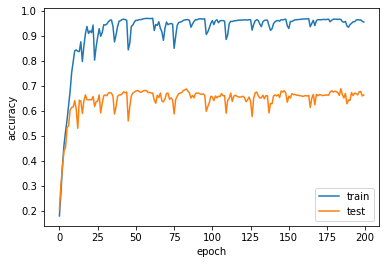

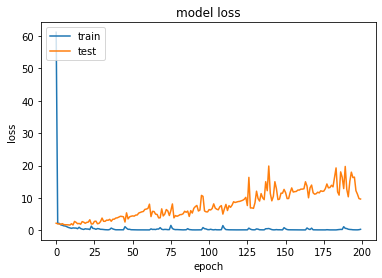

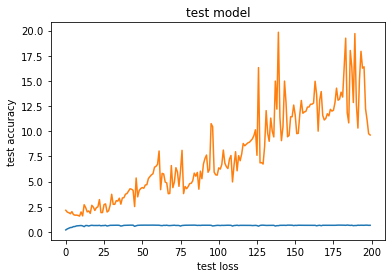

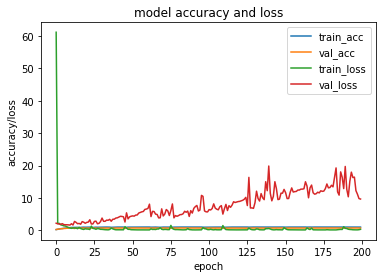

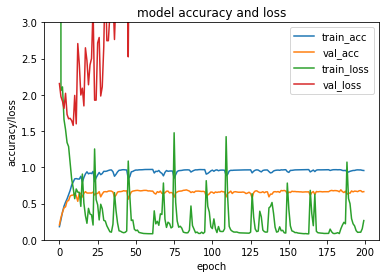

In [134]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(score)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc','train_loss','val_loss'], loc='upper right')

plt.ylim([0, 3])

plt.show()

In [9]:
# import h5py
# filename = "Best Like CWT CNN model 200 epcohs.hdf5"

# with h5py.File(filename, "r") as f:
#     # List all groups
#     print("Keys: %s" % f.keys())
#     a_group_key = list(f.keys())[0]

#     # Get the data
#     data = list(f[a_group_key])
    
    
# model = h5py.File(filename,'r+') 

from keras.models import load_model
model = load_model('Best Like CWT CNN model 200 epcohs.hdf5')

In [46]:
with open('data_preprocessed_python\\CWTprocesseddatalike.npy', 'rb') as DataFile:
    X_full  = np.load(DataFile)

np.save('data_preprocessed_python\\CWTprocessedlabelslike', eeg_labels_encoded, allow_pickle=True, fix_imports=True)

#loading saved labels

with open('data_preprocessed_python\\CWTprocessedlabels.npy', 'rb') as LabelFile:
    eeg_labels_encoded  = np.load(LabelFile)

## Splitting train-test

X_train, X_test, y_train, y_test = train_test_split(X_full, eeg_labels_encoded, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(max(y_train))

batch_size = 32 #they say 32 works well
num_classes = 9 #cos labels has dimension 10, or 10 types of one hot encoded labels
epochs = 200 #start out at 10, if good try 200


(3840, 69, 69, 3)
(960, 69, 69, 3)
(3840,)
(960,)
8


In [45]:
print(X_test.shape)

(960, 69, 69, 3)


In [47]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred=model.predict(X_test)

with open('data_preprocessed_python\\label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

Like_Test = np.ravel(N[:, [3]])
    
    #######################################################################################
L = Like_Test
    #######################################################################################
    
y_test = to_categorical(L)
print(y_test)

scaler = StandardScaler()
y_test = scaler.fit_transform(y_test)

y_test1=np.argmax(y_test, axis=0)
y_pred=np.argmax(y_pred,axis=0)

y_test1 = y_test1.reshape(-1,1)
y_pred  = y_pred.reshape(-1,1)

print(y_test1.shape)

cmatrix=confusion_matrix(y_test1, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 1)


ValueError: Found input variables with inconsistent numbers of samples: [10, 9]